In [ ]:
import pandas as pd

# Load dataset (update path accordingly)
df = pd.read_csv("crypto_dashboard_3h_1year.csv")

# Show columns and data types
print(df.dtypes)

# Show sample data
print(df.head())

timestamp                object
symbol                   object
coin_name                object
open                    float64
high                    float64
low                     float64
close                   float64
volume                  float64
market_cap_usd          float64
total_market_cap_usd    float64
dominance_pct           float64
price_change            float64
price_pct_change        float64
rolling_volatility      float64
dtype: object
             timestamp   symbol coin_name      open      high       low  \
0  2024-06-10 00:00:00  BTCUSDT   Bitcoin  69648.15  69801.34  69426.00   
1  2024-06-10 00:00:00  ETHUSDT  Ethereum   3706.40   3706.94   3685.54   
2  2024-06-10 03:00:00  BTCUSDT   Bitcoin  69716.01  69767.41  69530.00   
3  2024-06-10 03:00:00  ETHUSDT  Ethereum   3691.32   3692.81   3680.01   
4  2024-06-10 06:00:00  BTCUSDT   Bitcoin  69580.47  69618.76  69249.99   

      close       volume  market_cap_usd  total_market_cap_usd  dominance_pct  \
0  697

             open                                                            \
            count          mean           std       min       25%       50%   
coin_name                                                                     
Bitcoin    2917.0  81575.229506  17142.283719  51340.00  64096.01  84238.83   
Ethereum   2917.0   2749.137161    605.942156   1419.04   2411.79   2643.99   

                                 close                ... dominance_pct  \
                75%        max   count          mean  ...           75%   
coin_name                                             ...                 
Bitcoin    96909.55  111696.22  2917.0  81588.309212  ...     86.859872   
Ethereum    3307.71    4044.31  2917.0   2748.738862  ...     20.165051   

                    rolling_volatility                                     \
                max              count        mean         std        min   
coin_name                                                                 

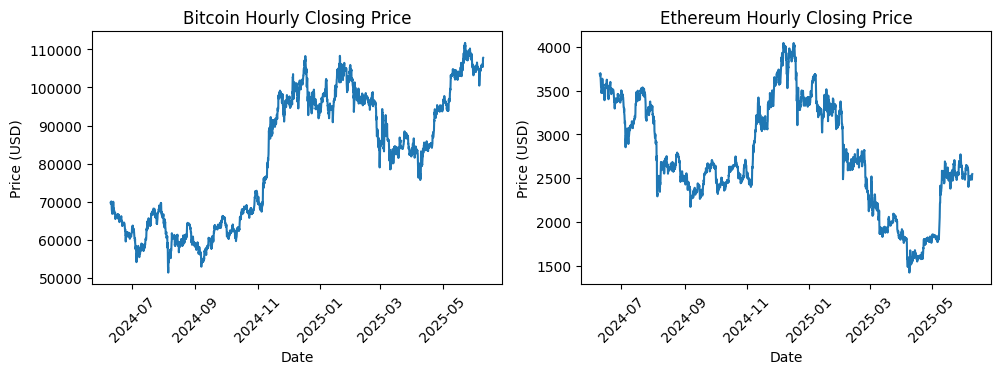

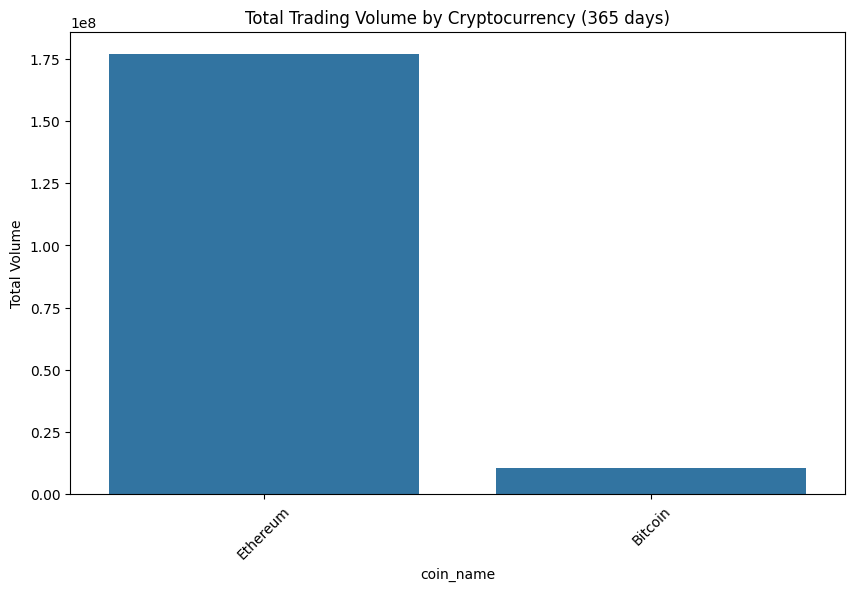

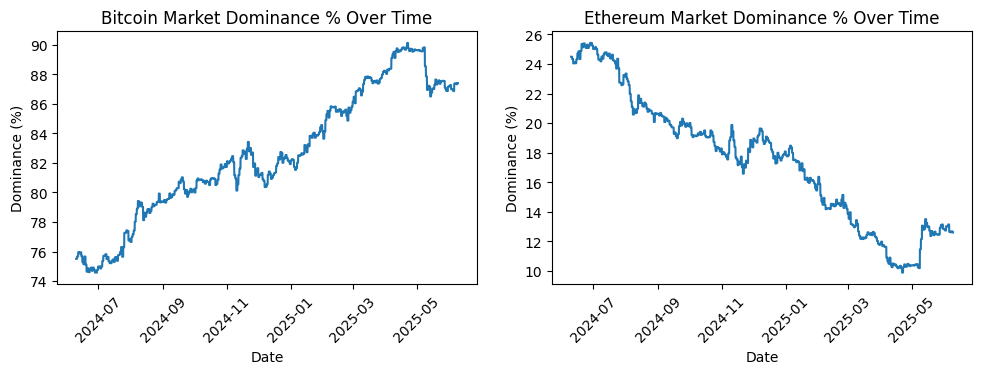

                       close    volume  market_cap_usd  dominance_pct  \
close               1.000000 -0.524360        0.995593       0.966735   
volume             -0.524360  1.000000       -0.516313      -0.562874   
market_cap_usd      0.995593 -0.516313        1.000000       0.952042   
dominance_pct       0.966735 -0.562874        0.952042       1.000000   
price_pct_change    0.014557 -0.070449        0.004312       0.009130   
rolling_volatility  0.694501 -0.336353        0.688332       0.679867   

                    price_pct_change  rolling_volatility  
close                       0.014557            0.694501  
volume                     -0.070449           -0.336353  
market_cap_usd              0.004312            0.688332  
dominance_pct               0.009130            0.679867  
price_pct_change            1.000000            0.014115  
rolling_volatility          0.014115            1.000000  


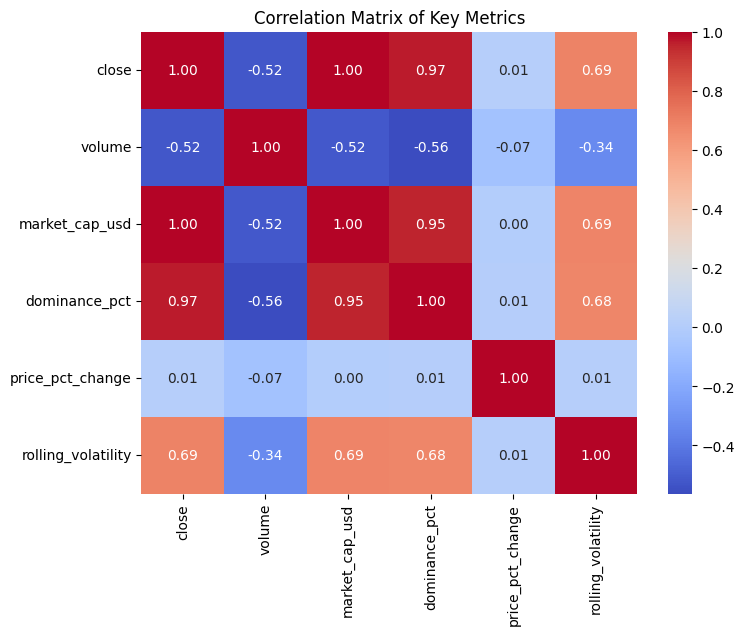

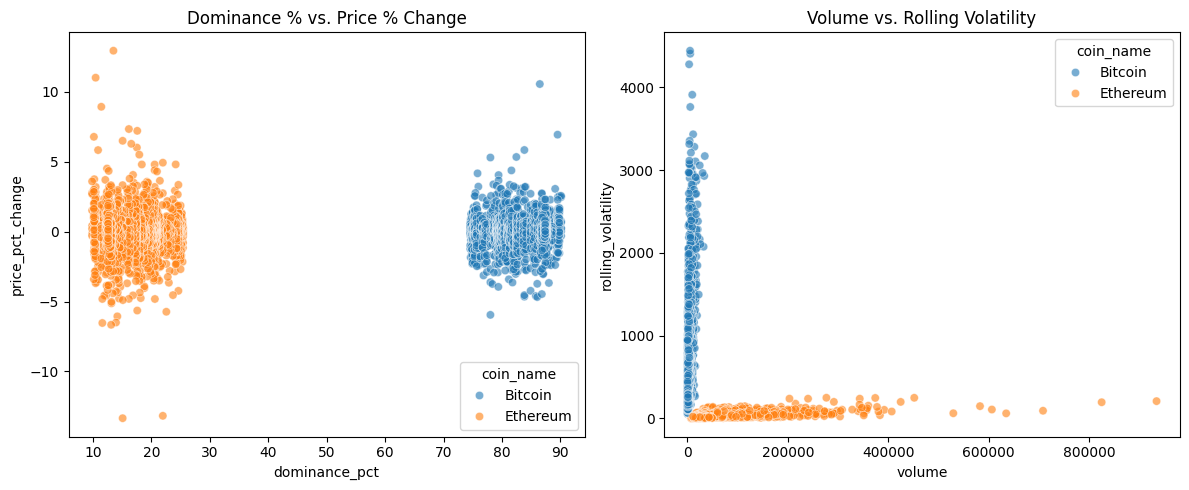

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/crypto_dashboard_3h_1year.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 1. Summary Statistics per Coin
summary = df.groupby('coin_name')[['open', 'close', 'volume', 'market_cap_usd', 'dominance_pct', 'rolling_volatility']].describe()
print(summary)

# 2. Hourly Closing Price Trend - Separate plots per coin
coins = df['coin_name'].unique()
plt.figure(figsize=(15,10))
for i, coin in enumerate(coins, 1):
    plt.subplot(3, 3, i)
    coin_df = df[df['coin_name'] == coin]
    plt.plot(coin_df['timestamp'], coin_df['close'])
    plt.title(f'{coin} Hourly Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Total Trading Volume per Coin
volumes = df.groupby('coin_name')['volume'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=volumes.index, y=volumes.values)
plt.title('Total Trading Volume by Cryptocurrency (365 days)')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.show()

# 4. Dominance Trends
plt.figure(figsize=(15,10))
for i, coin in enumerate(coins, 1):
    plt.subplot(3, 3, i)
    coin_df = df[df['coin_name'] == coin]
    plt.plot(coin_df['timestamp'], coin_df['dominance_pct'])
    plt.title(f'{coin} Market Dominance % Over Time')
    plt.xlabel('Date')
    plt.ylabel('Dominance (%)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
corr_vars = ['close', 'volume', 'market_cap_usd', 'dominance_pct', 'price_pct_change', 'rolling_volatility']
corr = df[corr_vars].corr()
print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Metrics')
plt.show()

# 6. Scatter Plot Examples
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='dominance_pct', y='price_pct_change', hue='coin_name', alpha=0.6)
plt.title('Dominance % vs. Price % Change')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='volume', y='rolling_volatility', hue='coin_name', alpha=0.6)
plt.title('Volume vs. Rolling Volatility')
plt.tight_layout()
plt.show()
